# Fintech Sector Portfolio Analysis

(Insert project description)

(Insert table of contents with clickable anchor links)

In [76]:
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
import yfinance as yf
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")

## Collect and Clean Data

### Create a function to generate a daily returns DataFrame for a given list of stocks within a fintech sector

In [77]:
def get_daily_returns_df(yf_tickers, ticker_names, period):
    """
    Returns a pandas DataFrame where each column are daily returns for the provided stocks. 
    Prints out each step of the data
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks 
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame with each stock's daily return data
    
    """

    stock_dfs = []
    
    # create pandas DataFrames for each stock in the yf ticker object, based on provided time period
    for ticker in ticker_names:
        stock_df = yf_tickers.tickers[ticker].history(period=period)
        
        # verify that the correct data was pulled
        print(f'{ticker} DataFame')
        display(stock_df.head())
        display(stock_df.tail())
        
        # select only the close values for daily returns
        stock_df = stock_df[['Close']]
        
        stock_dfs.append(stock_df)
        
    print('\n')
    
    # concat the list of closing price DataFrames
    daily_returns_df = pd.concat(stock_dfs, axis=1)
    daily_returns_df.columns = ticker_names

    # print out the concatenated DataFrame to verify correct closing price data
    print(f'Closing price DataFrame for {ticker_names}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())
    print('\n')    

    # convert closing prices to daily returns 
    daily_returns_df = daily_returns_df.pct_change().dropna()

    # print final daily returns DataFrame
    print(f'Daily returns DataFrame for {ticker_names}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())

    return daily_returns_df

In [78]:
# definte stock tickers for each sector 
paytech_ticker_names = ['PYPL', 'SQ', 'MA']
lending_ticker_names = ['TREE', 'LC', 'BKI']
banking_ticker_names = ['FISV', 'JKHY', 'FIS']

### Get 5 years of data for Paytech sector - PayPal, Square, and MasterCard

In [79]:
# create yfinance ticker object for paytech stocks
paytech_tickers = yf.Tickers('pypl sq ma')

# use tickers and 5 year period to get 5 years of paytech stock data 
paytech_daily_returns =  get_daily_returns_df(paytech_tickers, paytech_ticker_names, '5y')

PYPL DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-08 00:00:00-05:00  74.709999  74.709999  72.599998  72.910004   
2017-12-11 00:00:00-05:00  72.959999  73.680000  72.559998  73.290001   
2017-12-12 00:00:00-05:00  73.449997  74.309998  73.000000  73.620003   
2017-12-13 00:00:00-05:00  74.080002  75.419998  73.769997  74.089996   
2017-12-14 00:00:00-05:00  74.500000  75.529999  74.199997  74.260002   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-08 00:00:00-05:00  8350400          0             0  
2017-12-11 00:00:00-05:00  6421900          0             0  
2017-12-12 00:00:00-05:00  6573500          0             0  
2017-12-13 00:00:00-05:00  7196400          0             0  
2017-12-14 00:00:00-05:00  7519600          0             0

Open       High        Low      Close  \
Date                                                                    
2022-12-01 00:00:00-05:00  79.110001  80.746002  78.139999  78.529999   
2022-12-02 00:00:00-05:00  76.820000  77.059998  74.519997  74.660004   
2022-12-05 00:00:00-05:00  74.010002  75.489998  72.824997  73.620003   
2022-12-06 00:00:00-05:00  73.379997  73.839996  71.349998  72.230003   
2022-12-07 00:00:00-05:00  71.680000  75.339996  71.010002  74.419998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-01 00:00:00-05:00  15189000          0             0  
2022-12-02 00:00:00-05:00  24212900          0             0  
2022-12-05 00:00:00-05:00  18317200          0             0  
2022-12-06 00:00:00-05:00  14692600          0             0  
2022-12-07 00:00:00-05:00  24677900          0             0

SQ DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-08 00:00:00-05:00  39.610001  39.790001  37.939999  38.090000   
2017-12-11 00:00:00-05:00  38.150002  38.680000  37.700001  38.299999   
2017-12-12 00:00:00-05:00  38.070000  39.639999  37.930000  38.080002   
2017-12-13 00:00:00-05:00  38.169998  38.450001  36.070000  36.189999   
2017-12-14 00:00:00-05:00  35.849998  37.540001  35.799999  37.009998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2017-12-08 00:00:00-05:00  20917800          0             0  
2017-12-11 00:00:00-05:00  15780200          0             0  
2017-12-12 00:00:00-05:00  18834100          0             0  
2017-12-13 00:00:00-05:00  25376200          0             0  
2017-12-14 00:00:00-05:00  20939500          0             0

Open       High        Low      Close  \
Date                                                                    
2022-12-01 00:00:00-05:00  68.019997  69.239998  66.660004  69.169998   
2022-12-02 00:00:00-05:00  67.269997  68.940002  66.620003  68.180000   
2022-12-05 00:00:00-05:00  67.400002  67.860001  62.400002  63.139999   
2022-12-06 00:00:00-05:00  63.119999  63.879002  60.200001  61.299999   
2022-12-07 00:00:00-05:00  60.830002  61.849998  59.625000  61.070000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-01 00:00:00-05:00   9430000          0             0  
2022-12-02 00:00:00-05:00   7716000          0             0  
2022-12-05 00:00:00-05:00  12610900          0             0  
2022-12-06 00:00:00-05:00   9408900          0             0  
2022-12-07 00:00:00-05:00   8709100          0             0

MA DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-08 00:00:00-05:00  146.402333  146.421803  145.185720  145.886490   
2017-12-11 00:00:00-05:00  146.207692  147.210180  146.090902  146.850067   
2017-12-12 00:00:00-05:00  146.801380  149.623916  146.587255  148.426773   
2017-12-13 00:00:00-05:00  148.426791  149.341686  147.609230  147.638428   
2017-12-14 00:00:00-05:00  147.862312  149.448781  147.726052  147.872040   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-08 00:00:00-05:00  2521500        0.0             0  
2017-12-11 00:00:00-05:00  3394800        0.0             0  
2017-12-12 00:00:00-05:00  3360300        0.0             0  
2017-12-13 00:00:00-05:00  3618700        0.0             0  
2017-12-14 00:00:00-05:00  3016700        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-01 00:00:00-05:00  357.989990  361.579987  354.049988  360.799988   
2022-12-02 00:00:00-05:00  357.450012  362.290009  356.059998  360.059998   
2022-12-05 00:00:00-05:00  356.000000  358.899994  354.450012  356.089996   
2022-12-06 00:00:00-05:00  353.820007  355.000000  344.350006  347.529999   
2022-12-07 00:00:00-05:00  346.880005  347.850006  341.470001  347.420013   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-01 00:00:00-05:00  3374700        0.0             0  
2022-12-02 00:00:00-05:00  2015500        0.0             0  
2022-12-05 00:00:00-05:00  2202500        0.0             0  
2022-12-06 00:00:00-05:00  2353300        0.0             0  
2022-12-07 00:00:00-05:00  2454300        0.0             0



Closing price DataFrame for ['PYPL', 'SQ', 'MA']


PYPL         SQ          MA
Date                                                       
2017-12-08 00:00:00-05:00  72.910004  38.090000  145.886490
2017-12-11 00:00:00-05:00  73.290001  38.299999  146.850067
2017-12-12 00:00:00-05:00  73.620003  38.080002  148.426773
2017-12-13 00:00:00-05:00  74.089996  36.189999  147.638428
2017-12-14 00:00:00-05:00  74.260002  37.009998  147.872040

PYPL         SQ          MA
Date                                                       
2022-12-01 00:00:00-05:00  78.529999  69.169998  360.799988
2022-12-02 00:00:00-05:00  74.660004  68.180000  360.059998
2022-12-05 00:00:00-05:00  73.620003  63.139999  356.089996
2022-12-06 00:00:00-05:00  72.230003  61.299999  347.529999
2022-12-07 00:00:00-05:00  74.419998  61.070000  347.420013



Daily returns DataFrame for ['PYPL', 'SQ', 'MA']


PYPL        SQ        MA
Date                                                   
2017-12-11 00:00:00-05:00  0.005212  0.005513  0.006605
2017-12-12 00:00:00-05:00  0.004503 -0.005744  0.010737
2017-12-13 00:00:00-05:00  0.006384 -0.049632 -0.005311
2017-12-14 00:00:00-05:00  0.002295  0.022658  0.001582
2017-12-15 00:00:00-05:00  0.018718  0.000540  0.009675

PYPL        SQ        MA
Date                                                   
2022-12-01 00:00:00-05:00  0.001530  0.020658  0.012346
2022-12-02 00:00:00-05:00 -0.049280 -0.014313 -0.002051
2022-12-05 00:00:00-05:00 -0.013930 -0.073922 -0.011026
2022-12-06 00:00:00-05:00 -0.018881 -0.029142 -0.024039
2022-12-07 00:00:00-05:00  0.030320 -0.003752 -0.000316

### Get 5 years of data for Lending sector - LendingTree, LendingClub, Black Knight

In [80]:
# create yfinance ticker object for lending stocks
lending_tickers = yf.Tickers('tree lc bki')

# use tickers and 5 year period to get 5 years of lending stock data 
lending_daily_returns =  get_daily_returns_df(lending_tickers, lending_ticker_names, '5y')

TREE DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-08 00:00:00-05:00  314.950012  319.429993  308.899994  315.049988   
2017-12-11 00:00:00-05:00  316.049988  319.950012  307.750000  308.899994   
2017-12-12 00:00:00-05:00  308.850006  316.450012  307.250000  312.649994   
2017-12-13 00:00:00-05:00  316.000000  326.500000  308.950012  325.600006   
2017-12-14 00:00:00-05:00  329.549988  340.049988  325.149994  334.700012   

                           Volume  Dividends  Stock Splits  
Date                                                        
2017-12-08 00:00:00-05:00  258700          0             0  
2017-12-11 00:00:00-05:00  257800          0             0  
2017-12-12 00:00:00-05:00  171200          0             0  
2017-12-13 00:00:00-05:00  300500          0             0  
2017-12-14 00:00:00-05:00  406100          0             0

Open       High        Low      Close  Volume  \
Date                                                                            
2022-12-01 00:00:00-05:00  24.000000  25.240000  23.170000  25.120001  256900   
2022-12-02 00:00:00-05:00  24.250000  25.110001  23.629999  24.980000  204100   
2022-12-05 00:00:00-05:00  24.700001  25.370001  23.900000  23.980000  200000   
2022-12-06 00:00:00-05:00  23.930000  23.930000  22.549999  22.600000  262700   
2022-12-07 00:00:00-05:00  22.500000  22.590000  21.280001  21.610001  307200   

                           Dividends  Stock Splits  
Date                                                
2022-12-01 00:00:00-05:00          0             0  
2022-12-02 00:00:00-05:00          0             0  
2022-12-05 00:00:00-05:00          0             0  
2022-12-06 00:00:00-05:00          0             0  
2022-12-07 00:00:00-05:00          0             0

LC DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-08 00:00:00-05:00  18.700001  18.700001  17.299999  17.549999   
2017-12-11 00:00:00-05:00  19.525000  19.850000  17.000000  19.450001   
2017-12-12 00:00:00-05:00  19.650000  22.100000  19.650000  21.049999   
2017-12-13 00:00:00-05:00  21.100000  21.250000  18.850000  20.100000   
2017-12-14 00:00:00-05:00  19.950001  20.700001  19.650000  19.950001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2017-12-08 00:00:00-05:00   4030720          0           0.0  
2017-12-11 00:00:00-05:00  10947060          0           0.0  
2017-12-12 00:00:00-05:00   5742200          0           0.0  
2017-12-13 00:00:00-05:00   2983500          0           0.0  
2017-12-14 00:00:00-05:00   1281300          0           0.0

Open    High     Low  Close   Volume  Dividends  \
Date                                                                          
2022-12-01 00:00:00-05:00  10.42  10.550  10.195  10.24  1034500          0   
2022-12-02 00:00:00-05:00  10.19  10.375   9.990  10.18  1111000          0   
2022-12-05 00:00:00-05:00  10.16  10.430   9.850   9.88  1283600          0   
2022-12-06 00:00:00-05:00   9.88   9.900   9.340   9.56  1425400          0   
2022-12-07 00:00:00-05:00   9.47   9.610   9.360   9.48   969100          0   

                           Stock Splits  
Date                                     
2022-12-01 00:00:00-05:00           0.0  
2022-12-02 00:00:00-05:00           0.0  
2022-12-05 00:00:00-05:00           0.0  
2022-12-06 00:00:00-05:00           0.0  
2022-12-07 00:00:00-05:00           0.0

BKI DataFame


Open       High        Low      Close  Volume  \
Date                                                                            
2017-12-08 00:00:00-05:00  45.200001  45.724998  44.950001  45.549999  625700   
2017-12-11 00:00:00-05:00  45.500000  45.900002  45.275002  45.599998  506100   
2017-12-12 00:00:00-05:00  45.500000  45.549999  45.049999  45.099998  240900   
2017-12-13 00:00:00-05:00  45.099998  45.549999  44.849998  45.400002  595400   
2017-12-14 00:00:00-05:00  45.250000  45.799999  44.875000  45.250000  976300   

                           Dividends  Stock Splits  
Date                                                
2017-12-08 00:00:00-05:00          0             0  
2017-12-11 00:00:00-05:00          0             0  
2017-12-12 00:00:00-05:00          0             0  
2017-12-13 00:00:00-05:00          0             0  
2017-12-14 00:00:00-05:00          0             0

Open       High        Low      Close  Volume  \
Date                                                                            
2022-12-01 00:00:00-05:00  62.040001  63.310001  61.709999  61.950001  678500   
2022-12-02 00:00:00-05:00  61.040001  62.130001  60.930000  61.389999  633500   
2022-12-05 00:00:00-05:00  60.950001  61.000000  59.808998  59.970001  745000   
2022-12-06 00:00:00-05:00  59.860001  60.040001  59.130001  59.290001  592800   
2022-12-07 00:00:00-05:00  59.180000  59.709999  57.799999  59.080002  616300   

                           Dividends  Stock Splits  
Date                                                
2022-12-01 00:00:00-05:00          0             0  
2022-12-02 00:00:00-05:00          0             0  
2022-12-05 00:00:00-05:00          0             0  
2022-12-06 00:00:00-05:00          0             0  
2022-12-07 00:00:00-05:00          0             0



Closing price DataFrame for ['TREE', 'LC', 'BKI']


TREE         LC        BKI
Date                                                       
2017-12-08 00:00:00-05:00  315.049988  17.549999  45.549999
2017-12-11 00:00:00-05:00  308.899994  19.450001  45.599998
2017-12-12 00:00:00-05:00  312.649994  21.049999  45.099998
2017-12-13 00:00:00-05:00  325.600006  20.100000  45.400002
2017-12-14 00:00:00-05:00  334.700012  19.950001  45.250000

TREE     LC        BKI
Date                                                  
2022-12-01 00:00:00-05:00  25.120001  10.24  61.950001
2022-12-02 00:00:00-05:00  24.980000  10.18  61.389999
2022-12-05 00:00:00-05:00  23.980000   9.88  59.970001
2022-12-06 00:00:00-05:00  22.600000   9.56  59.290001
2022-12-07 00:00:00-05:00  21.610001   9.48  59.080002



Daily returns DataFrame for ['TREE', 'LC', 'BKI']


TREE        LC       BKI
Date                                                   
2017-12-11 00:00:00-05:00 -0.019521  0.108262  0.001098
2017-12-12 00:00:00-05:00  0.012140  0.082262 -0.010965
2017-12-13 00:00:00-05:00  0.041420 -0.045131  0.006652
2017-12-14 00:00:00-05:00  0.027948 -0.007463 -0.003304
2017-12-15 00:00:00-05:00  0.028832  0.010025 -0.004420

TREE        LC       BKI
Date                                                   
2022-12-01 00:00:00-05:00  0.048852 -0.006790 -0.000645
2022-12-02 00:00:00-05:00 -0.005573 -0.005859 -0.009040
2022-12-05 00:00:00-05:00 -0.040032 -0.029470 -0.023131
2022-12-06 00:00:00-05:00 -0.057548 -0.032389 -0.011339
2022-12-07 00:00:00-05:00 -0.043805 -0.008368 -0.003542

### Get 5 years of data for Banking sector - Fiserv, Jack Henry & Associates, FIS (Fidelity National Information Services)

In [81]:
# create yfinance ticker object for banking stocks
banking_tickers = yf.Tickers('fisv jkhy fis')

# use tickers and 5 year period to get 5 years of lending stock data 
banking_daily_returns = get_daily_returns_df(banking_tickers, banking_ticker_names, '5y')

FISV DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-08 00:00:00-05:00  65.945000  66.059998  65.635002  65.860001   
2017-12-11 00:00:00-05:00  65.699997  65.915001  65.565002  65.915001   
2017-12-12 00:00:00-05:00  66.000000  66.160004  65.544998  65.599998   
2017-12-13 00:00:00-05:00  65.730003  66.035004  65.139999  65.404999   
2017-12-14 00:00:00-05:00  65.370003  65.500000  64.919998  64.949997   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-08 00:00:00-05:00  1142400          0           0.0  
2017-12-11 00:00:00-05:00  1514400          0           0.0  
2017-12-12 00:00:00-05:00  1252000          0           0.0  
2017-12-13 00:00:00-05:00  1732000          0           0.0  
2017-12-14 00:00:00-05:00  1519400          0           0.0

Open        High         Low       Close  \
Date                                                                        
2022-12-01 00:00:00-05:00  104.360001  105.500000  103.980003  105.029999   
2022-12-02 00:00:00-05:00  103.370003  105.849998  103.370003  105.459999   
2022-12-05 00:00:00-05:00  104.750000  104.750000  101.629997  102.190002   
2022-12-06 00:00:00-05:00  102.540001  102.610001   99.910004  100.349998   
2022-12-07 00:00:00-05:00  100.610001  101.150002   99.559998  100.489998   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-01 00:00:00-05:00  3086900          0           0.0  
2022-12-02 00:00:00-05:00  2881700          0           0.0  
2022-12-05 00:00:00-05:00  3411800          0           0.0  
2022-12-06 00:00:00-05:00  2342200          0           0.0  
2022-12-07 00:00:00-05:00  2361700          0           0.0

JKHY DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-08 00:00:00-05:00  110.988856  111.329545  110.562998  110.998322   
2017-12-11 00:00:00-05:00  110.818508  111.272763  110.402116  110.619774   
2017-12-12 00:00:00-05:00  110.695507  110.913166  109.966808  110.070908   
2017-12-13 00:00:00-05:00  110.014119  110.932087  109.805919  110.033043   
2017-12-14 00:00:00-05:00  110.061436  110.818518  109.730205  109.834305   

                           Volume  Dividends  Stock Splits  
Date                                                        
2017-12-08 00:00:00-05:00  202100        0.0             0  
2017-12-11 00:00:00-05:00  219600        0.0             0  
2017-12-12 00:00:00-05:00  216500        0.0             0  
2017-12-13 00:00:00-05:00  273500        0.0             0  
2017-12-14 00:00:00-05:00  282100        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-01 00:00:00-05:00  189.750000  191.610001  188.270004  190.729996   
2022-12-02 00:00:00-05:00  188.500000  192.330002  188.289993  191.600006   
2022-12-05 00:00:00-05:00  190.729996  190.860001  188.490005  188.929993   
2022-12-06 00:00:00-05:00  188.500000  188.610001  182.690002  183.490005   
2022-12-07 00:00:00-05:00  183.960007  186.059998  183.000000  184.779999   

                           Volume  Dividends  Stock Splits  
Date                                                        
2022-12-01 00:00:00-05:00  531800        0.0             0  
2022-12-02 00:00:00-05:00  490000        0.0             0  
2022-12-05 00:00:00-05:00  388000        0.0             0  
2022-12-06 00:00:00-05:00  445900        0.0             0  
2022-12-07 00:00:00-05:00  377600        0.0             0

FIS DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-08 00:00:00-05:00  90.240478  90.493835  89.621175  89.940208   
2017-12-11 00:00:00-05:00  89.902663  90.080951  89.264589  89.808830   
2017-12-12 00:00:00-05:00  89.517979  89.959001  88.307515  88.429497   
2017-12-13 00:00:00-05:00  88.269978  89.311539  88.185530  88.448265   
2017-12-14 00:00:00-05:00  88.514138  88.909457  88.071755  88.099991   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-08 00:00:00-05:00  1683500       0.00             0  
2017-12-11 00:00:00-05:00  1188300       0.00             0  
2017-12-12 00:00:00-05:00  2546100       0.00             0  
2017-12-13 00:00:00-05:00  1496500       0.00             0  
2017-12-14 00:00:00-05:00  1487900       0.29             0

Open       High        Low      Close  \
Date                                                                    
2022-12-01 00:00:00-05:00  72.690002  74.300003  72.349998  73.180000   
2022-12-02 00:00:00-05:00  72.750000  75.000000  72.589996  74.059998   
2022-12-05 00:00:00-05:00  73.339996  74.019997  72.599998  72.870003   
2022-12-06 00:00:00-05:00  72.500000  72.790001  68.750000  69.730003   
2022-12-07 00:00:00-05:00  69.330002  69.690002  67.379997  69.230003   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-01 00:00:00-05:00  8105200        0.0             0  
2022-12-02 00:00:00-05:00  8741500        0.0             0  
2022-12-05 00:00:00-05:00  7357800        0.0             0  
2022-12-06 00:00:00-05:00  9632700        0.0             0  
2022-12-07 00:00:00-05:00  9114600        0.0             0



Closing price DataFrame for ['FISV', 'JKHY', 'FIS']


FISV        JKHY        FIS
Date                                                       
2017-12-08 00:00:00-05:00  65.860001  110.998322  89.940208
2017-12-11 00:00:00-05:00  65.915001  110.619774  89.808830
2017-12-12 00:00:00-05:00  65.599998  110.070908  88.429497
2017-12-13 00:00:00-05:00  65.404999  110.033043  88.448265
2017-12-14 00:00:00-05:00  64.949997  109.834305  88.099991

FISV        JKHY        FIS
Date                                                        
2022-12-01 00:00:00-05:00  105.029999  190.729996  73.180000
2022-12-02 00:00:00-05:00  105.459999  191.600006  74.059998
2022-12-05 00:00:00-05:00  102.190002  188.929993  72.870003
2022-12-06 00:00:00-05:00  100.349998  183.490005  69.730003
2022-12-07 00:00:00-05:00  100.489998  184.779999  69.230003



Daily returns DataFrame for ['FISV', 'JKHY', 'FIS']


FISV      JKHY       FIS
Date                                                   
2017-12-11 00:00:00-05:00  0.000835 -0.003410 -0.001461
2017-12-12 00:00:00-05:00 -0.004779 -0.004962 -0.015359
2017-12-13 00:00:00-05:00 -0.002973 -0.000344  0.000212
2017-12-14 00:00:00-05:00 -0.006957 -0.001806 -0.003938
2017-12-15 00:00:00-05:00  0.015858  0.018783  0.013141

FISV      JKHY       FIS
Date                                                   
2022-12-01 00:00:00-05:00  0.006420  0.007288  0.008267
2022-12-02 00:00:00-05:00  0.004094  0.004561  0.012025
2022-12-05 00:00:00-05:00 -0.031007 -0.013935 -0.016068
2022-12-06 00:00:00-05:00 -0.018006 -0.028794 -0.043090
2022-12-07 00:00:00-05:00  0.001395  0.007030 -0.007171

## Data Analysis and Calculations

### Plot the daily returns in composite graphs for each sector

In [82]:
paytech_daily_returns['PYPL'].hvplot(
    title='PayPal Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + paytech_daily_returns['SQ'].hvplot(
    title='Square Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + paytech_daily_returns['MA'].hvplot(
    title='MasterCard Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
)

:Layout
   .Curve.PYPL :Curve   [Date]   (PYPL)
   .Curve.SQ   :Curve   [Date]   (SQ)
   .Curve.MA   :Curve   [Date]   (MA)

In [83]:
lending_daily_returns['TREE'].hvplot(
    title='LendingTree Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + lending_daily_returns['LC'].hvplot(
    title='LendingClub Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + lending_daily_returns['BKI'].hvplot(
    title='Black Knight Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
)

:Layout
   .Curve.TREE :Curve   [Date]   (TREE)
   .Curve.LC   :Curve   [Date]   (LC)
   .Curve.BKI  :Curve   [Date]   (BKI)

In [84]:
banking_daily_returns['FISV'].hvplot(
    title='Fiserv Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + banking_daily_returns['JKHY'].hvplot(
    title='Jack Henry & Associates Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
) + banking_daily_returns['FIS'].hvplot(
    title='FIS Daily Returns 2017-2022',
    frame_height=500,
    frame_width=900
)

:Layout
   .Curve.FISV :Curve   [Date]   (FISV)
   .Curve.JKHY :Curve   [Date]   (JKHY)
   .Curve.FIS  :Curve   [Date]   (FIS)

In [85]:
paytech_daily_box_plot = paytech_daily_returns.hvplot.box(
    title='Paytech (PayPal, Square, MasterCard) Daily Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker',
    ylabel='Daily Returns (%)'
)

paytech_daily_box_plot

:BoxWhisker   [Stock Ticker]   (value)

In [86]:
lending_daily_plot = lending_daily_returns.hvplot.box(
    title='Lending (LendingTree, LendingClub, Black Knight) Daily Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker',
    ylabel='Daily Returns (%)'
)

lending_daily_plot

:BoxWhisker   [Stock Ticker]   (value)

In [87]:
banking_daily_box_plot = banking_daily_returns.hvplot.box(
    title='Banking (Fiserv, Jack Henry & Associates, FIS) Daily Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker',
    ylabel='Daily Returns (%)'
)

banking_daily_box_plot

:BoxWhisker   [Stock Ticker]   (value)

## Calculate and plot the cumulative returns of each sector 

In [88]:
paytech_cumulative_returns = (1 + paytech_daily_returns).cumprod()
lending_cumulative_returns = (1 + lending_daily_returns).cumprod()
banking_cumulative_returns = (1 + banking_daily_returns).cumprod()

In [89]:
paytech_cumulative_plot = paytech_cumulative_returns.hvplot(
    title='Paytech (PayPal, Square, MasterCard) Cumulative Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker'
)

paytech_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [90]:
lending_cumulative_plot = lending_cumulative_returns.hvplot(
    title='Lending (LendingTree, LendingClub, Black Knight) Cumulative Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker'
)

lending_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [91]:
banking_cumulative_plot = banking_cumulative_returns.hvplot(
    title='Banking (Fiserv, Jack Henry & Associates, FIS) Cumulative Returns 2017-2022',
    frame_width=1000,
    frame_height=600,
    group_label='Stock Ticker'
)

banking_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [92]:
# combine the sector cumulative return plots in an overlay plot
cumulative_overlay_plot = paytech_cumulative_plot * lending_cumulative_plot * banking_cumulative_plot
cumulative_overlay_plot.opts(title='Cumulative Returns for Paytech, Lending, and Banking Sectors 2017-2022')

:Overlay
   .NdOverlay.I   :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)
   .NdOverlay.II  :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)
   .NdOverlay.III :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)

## Calculate and plot 21-Day Rolling Average and Standard Deviation for each sector

In [93]:
paytech_rolling_mean = paytech_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=1000,
    frame_height=600, 
    title = "Paytech Daily Prices - 21-Day Rolling Average")

paytech_rolling_stdev = paytech_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=1000,
    frame_height=600, 
    title = "Paytech Daily Prices - 21-Day Rolling Standard Deviation")

display(paytech_rolling_mean)
display(paytech_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [94]:
lending_rolling_mean = lending_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=1000,
    frame_height=600, 
    title = "Lending Daily Prices - 21-Day Rolling Average")

lending_rolling_stdev = lending_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=1000,
    frame_height=600, 
    title = "Lending Daily Prices - 21-Day Rolling Standard Deviation")

display(lending_rolling_mean)
display(lending_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [95]:
banking_rolling_mean = banking_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=1000,
    frame_height=600, 
    title = "Lending Daily Prices - 21-Day Rolling Average")

banking_rolling_stdev = banking_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=1000,
    frame_height=600, 
    title = "Lending Daily Prices - 21-Day Rolling Standard Deviation")

display(banking_rolling_mean)
display(banking_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Analyze trend from Banking and Lending to Paytech

In [96]:
def calc_roll_beta(daily_returns, variance_daily_returns, roll_window):
    """
    Returns a Series that represents the rolling (roll_window)-day beta by calculating: 
    
    beta = (rolling covariance of daily_retunrs.cov(variance_daily_returns)) / (rolling variance of variance_daily_returns)
    
    Parameters
    ----------
    daily_returns: pandas.Series
        daily returns (with Datetime index) of the data you want to get the beta for 
    variance_daily_returns: pandas.Series
        daily returns (with Datetime index) of the data you want to use for the variance when calculating the beta 
        also will be used to calculate the covariance 
    roll_window: int
        the number of trading days that will be used for the rolling window 
        
    Returns
    -------
    pandas Series that represents the beta of daily_returns assuming variance_daily_returns is used for variance and covariance
    """
    
    variance = variance_daily_returns.rolling(window=roll_window).var()
    covariance = daily_returns.rolling(window=roll_window).cov(variance_daily_returns)
    
    return covariance / variance

In [97]:
banking_roll60_beta = calc_roll_beta(banking_daily_returns.mean(axis=1), paytech_daily_returns.mean(axis=1), 60)
banking_roll60_beta.hvplot(
    title='Banking Sector 60-Day Rolling Beta With Paytech Sector',
    frame_height=400,
    frame_width=700
)

:Curve   [Date]   (0)

In [98]:
lending_roll60_beta = calc_roll_beta(lending_daily_returns.mean(axis=1), paytech_daily_returns.mean(axis=1), 60)
lending_roll60_beta.hvplot(
    title='Lending Sector 60-Day Rolling Beta With Paytech Sector',
    frame_height=400,
    frame_width=700
)

:Curve   [Date]   (0)

# Monte Carlo Simulations

## Reformat sector DataFrames to be usable by MCSimulation module

In [99]:
def get_data_for_mcsim(yf_tickers, ticker_names, period):
    """
    Returns a DataFrame with multi-level column names as required by the MCSimulation module 
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame where the first level of columns is the stock ticker and the second is each stock's OHLCV data
    
    """
    
    stock_dfs = []
    
    for ticker in ticker_names:
        # add the full DataFrame, except for extraneous columns, to list for concat
        stock_dfs.append(yf_tickers.tickers[ticker].history(period=period).drop(['Dividends', 'Stock Splits'], axis=1))
    
    mc_data_df = pd.concat(stock_dfs, axis=1, keys=ticker_names)

    # rename Close to lower case so MCSimulation can select it 
    mc_data_df = mc_data_df.rename(columns={'Close': 'close'})
    
    display(mc_data_df.head())
    display(mc_data_df.tail())
    
    return mc_data_df

In [100]:
# format data for Paytech sector
paytech_df = get_data_for_mcsim(paytech_tickers, paytech_ticker_names, '5y')

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-08 00:00:00-05:00  74.709999  74.709999  72.599998  72.910004   
2017-12-11 00:00:00-05:00  72.959999  73.680000  72.559998  73.290001   
2017-12-12 00:00:00-05:00  73.449997  74.309998  73.000000  73.620003   
2017-12-13 00:00:00-05:00  74.080002  75.419998  73.769997  74.089996   
2017-12-14 00:00:00-05:00  74.500000  75.529999  74.199997  74.260002   

                                           SQ                        \
                            Volume       Open       High        Low   
Date                                                                  
2017-12-08 00:00:00-05:00  8350400  39.610001  39.790001  37.939999   
2017-12-11 00:00:00-05:00  6421900  38.150002  38.680000  37.700001   
2017-12-12 00:00:00-05:00  6573500  38.070000  39.639999  37.930000   
2017-12-13 00:00:00-05:00  7196400  38.169998  38.450001  36.070000   
2017-12-14 00:00:00-05:00  7519600  35.849998  37.540001  35.799999   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2017-12-08 00:00:00-05:00  38.090000  20917800  146.402333  146.421803   
2017-12-11 00:00:00-05:00  38.299999  15780200  146.207661  147.210149   
2017-12-12 00:00:00-05:00  38.080002  18834100  146.801365  149.623901   
2017-12-13 00:00:00-05:00  36.189999  25376200  148.426837  149.341732   
2017-12-14 00:00:00-05:00  37.009998  20939500  147.862266  149.448734   

                                                            
                                  Low       close   Volume  
Date                                                        
2017-12-08 00:00:00-05:00  145.185720  145.886490  2521500  
2017-12-11 00:00:00-05:00  146.090871  146.850037  3394800  
2017-12-12 00:00:00-05:00  146.587240  148.426758  3360300  
2017-12-13 00:00:00-05:00  147.609276  147.638474  3618700  
2017-12-14 00:00:00-05:00  147.726006  147.871994  3016700

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2022-12-01 00:00:00-05:00  79.110001  80.746002  78.139999  78.529999   
2022-12-02 00:00:00-05:00  76.820000  77.059998  74.519997  74.660004   
2022-12-05 00:00:00-05:00  74.010002  75.489998  72.824997  73.620003   
2022-12-06 00:00:00-05:00  73.379997  73.839996  71.349998  72.230003   
2022-12-07 00:00:00-05:00  71.680000  75.339996  71.010002  74.419998   

                                            SQ                        \
                             Volume       Open       High        Low   
Date                                                                   
2022-12-01 00:00:00-05:00  15189000  68.019997  69.239998  66.660004   
2022-12-02 00:00:00-05:00  24212900  67.269997  68.940002  66.620003   
2022-12-05 00:00:00-05:00  18317200  67.400002  67.860001  62.400002   
2022-12-06 00:00:00-05:00  14692600  63.119999  63.879002  60.200001   
2022-12-07 00:00:00-05:00  24677900  60.830002  61.849998  59.625000   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2022-12-01 00:00:00-05:00  69.169998   9430000  357.989990  361.579987   
2022-12-02 00:00:00-05:00  68.180000   7716000  357.450012  362.290009   
2022-12-05 00:00:00-05:00  63.139999  12610900  356.000000  358.899994   
2022-12-06 00:00:00-05:00  61.299999   9408900  353.820007  355.000000   
2022-12-07 00:00:00-05:00  61.070000   8709100  346.880005  347.850006   

                                                            
                                  Low       close   Volume  
Date                                                        
2022-12-01 00:00:00-05:00  354.049988  360.799988  3374700  
2022-12-02 00:00:00-05:00  356.059998  360.059998  2015500  
2022-12-05 00:00:00-05:00  354.450012  356.089996  2202500  
2022-12-06 00:00:00-05:00  344.350006  347.529999  2353300  
2022-12-07 00:00:00-05:00  341.470001  347.420013  2454300

In [101]:
# format data for lending sector
lending_df = get_data_for_mcsim(lending_tickers, lending_ticker_names, '5y')

TREE                                      \
                                 Open        High         Low       close   
Date                                                                        
2017-12-08 00:00:00-05:00  314.950012  319.429993  308.899994  315.049988   
2017-12-11 00:00:00-05:00  316.049988  319.950012  307.750000  308.899994   
2017-12-12 00:00:00-05:00  308.850006  316.450012  307.250000  312.649994   
2017-12-13 00:00:00-05:00  316.000000  326.500000  308.950012  325.600006   
2017-12-14 00:00:00-05:00  329.549988  340.049988  325.149994  334.700012   

                                          LC                                   \
                           Volume       Open       High        Low      close   
Date                                                                            
2017-12-08 00:00:00-05:00  258700  18.700001  18.700001  17.299999  17.549999   
2017-12-11 00:00:00-05:00  257800  19.525000  19.850000  17.000000  19.450001   
2017-12-12 00:00:00-05:00  171200  19.650000  22.100000  19.650000  21.049999   
2017-12-13 00:00:00-05:00  300500  21.100000  21.250000  18.850000  20.100000   
2017-12-14 00:00:00-05:00  406100  19.950001  20.700001  19.650000  19.950001   

                                           BKI                        \
                             Volume       Open       High        Low   
Date                                                                   
2017-12-08 00:00:00-05:00   4030720  45.200001  45.724998  44.950001   
2017-12-11 00:00:00-05:00  10947060  45.500000  45.900002  45.275002   
2017-12-12 00:00:00-05:00   5742200  45.500000  45.549999  45.049999   
2017-12-13 00:00:00-05:00   2983500  45.099998  45.549999  44.849998   
2017-12-14 00:00:00-05:00   1281300  45.250000  45.799999  44.875000   

                                              
                               close  Volume  
Date                                          
2017-12-08 00:00:00-05:00  45.549999  625700  
2017-12-11 00:00:00-05:00  45.599998  506100  
2017-12-12 00:00:00-05:00  45.099998  240900  
2017-12-13 00:00:00-05:00  45.400002  595400  
2017-12-14 00:00:00-05:00  45.250000  976300

TREE                                           \
                                Open       High        Low      close  Volume   
Date                                                                            
2022-12-01 00:00:00-05:00  24.000000  25.240000  23.170000  25.120001  256900   
2022-12-02 00:00:00-05:00  24.250000  25.110001  23.629999  24.980000  204100   
2022-12-05 00:00:00-05:00  24.700001  25.370001  23.900000  23.980000  200000   
2022-12-06 00:00:00-05:00  23.930000  23.930000  22.549999  22.600000  262700   
2022-12-07 00:00:00-05:00  22.500000  22.590000  21.280001  21.610001  307200   

                              LC                                        BKI  \
                            Open    High     Low  close   Volume       Open   
Date                                                                          
2022-12-01 00:00:00-05:00  10.42  10.550  10.195  10.24  1034500  62.040001   
2022-12-02 00:00:00-05:00  10.19  10.375   9.990  10.18  1111000  61.040001   
2022-12-05 00:00:00-05:00  10.16  10.430   9.850   9.88  1283600  60.950001   
2022-12-06 00:00:00-05:00   9.88   9.900   9.340   9.56  1425400  59.860001   
2022-12-07 00:00:00-05:00   9.47   9.610   9.360   9.48   969100  59.180000   

                                                                    
                                High        Low      close  Volume  
Date                                                                
2022-12-01 00:00:00-05:00  63.310001  61.709999  61.950001  678500  
2022-12-02 00:00:00-05:00  62.130001  60.930000  61.389999  633500  
2022-12-05 00:00:00-05:00  61.000000  59.808998  59.970001  745000  
2022-12-06 00:00:00-05:00  60.040001  59.130001  59.290001  592800  
2022-12-07 00:00:00-05:00  59.709999  57.799999  59.080002  616300

In [102]:
banking_df = get_data_for_mcsim(banking_tickers, banking_ticker_names, '5y')

FISV                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-08 00:00:00-05:00  65.945000  66.059998  65.635002  65.860001   
2017-12-11 00:00:00-05:00  65.699997  65.915001  65.565002  65.915001   
2017-12-12 00:00:00-05:00  66.000000  66.160004  65.544998  65.599998   
2017-12-13 00:00:00-05:00  65.730003  66.035004  65.139999  65.404999   
2017-12-14 00:00:00-05:00  65.370003  65.500000  64.919998  64.949997   

                                          JKHY                          \
                            Volume        Open        High         Low   
Date                                                                     
2017-12-08 00:00:00-05:00  1142400  110.988864  111.329553  110.563005   
2017-12-11 00:00:00-05:00  1514400  110.818531  111.272786  110.402138   
2017-12-12 00:00:00-05:00  1252000  110.695484  110.913143  109.966785   
2017-12-13 00:00:00-05:00  1732000  110.014127  110.932095  109.805927   
2017-12-14 00:00:00-05:00  1519400  110.061405  110.818487  109.730174   

                                                     FIS             \
                                close  Volume       Open       High   
Date                                                                  
2017-12-08 00:00:00-05:00  110.998329  202100  90.240478  90.493835   
2017-12-11 00:00:00-05:00  110.619797  219600  89.902678  90.080966   
2017-12-12 00:00:00-05:00  110.070885  216500  89.517963  89.958986   
2017-12-13 00:00:00-05:00  110.033051  273500  88.269955  89.311516   
2017-12-14 00:00:00-05:00  109.834274  282100  88.514138  88.909457   

                                                          
                                 Low      close   Volume  
Date                                                      
2017-12-08 00:00:00-05:00  89.621175  89.940208  1683500  
2017-12-11 00:00:00-05:00  89.264605  89.808846  1188300  
2017-12-12 00:00:00-05:00  88.307499  88.429482  2546100  
2017-12-13 00:00:00-05:00  88.185507  88.448242  1496500  
2017-12-14 00:00:00-05:00  88.071755  88.099991  1487900

FISV                                      \
                                 Open        High         Low       close   
Date                                                                        
2022-12-01 00:00:00-05:00  104.360001  105.500000  103.980003  105.029999   
2022-12-02 00:00:00-05:00  103.370003  105.849998  103.370003  105.459999   
2022-12-05 00:00:00-05:00  104.750000  104.750000  101.629997  102.190002   
2022-12-06 00:00:00-05:00  102.540001  102.610001   99.910004  100.349998   
2022-12-07 00:00:00-05:00  100.610001  101.150002   99.559998  100.489998   

                                          JKHY                          \
                            Volume        Open        High         Low   
Date                                                                     
2022-12-01 00:00:00-05:00  3086900  189.750000  191.610001  188.270004   
2022-12-02 00:00:00-05:00  2881700  188.500000  192.330002  188.289993   
2022-12-05 00:00:00-05:00  3411800  190.729996  190.860001  188.490005   
2022-12-06 00:00:00-05:00  2342200  188.500000  188.610001  182.690002   
2022-12-07 00:00:00-05:00  2361700  183.960007  186.059998  183.000000   

                                                     FIS             \
                                close  Volume       Open       High   
Date                                                                  
2022-12-01 00:00:00-05:00  190.729996  531800  72.690002  74.300003   
2022-12-02 00:00:00-05:00  191.600006  490000  72.750000  75.000000   
2022-12-05 00:00:00-05:00  188.929993  388000  73.339996  74.019997   
2022-12-06 00:00:00-05:00  183.490005  445900  72.500000  72.790001   
2022-12-07 00:00:00-05:00  184.779999  377600  69.330002  69.690002   

                                                          
                                 Low      close   Volume  
Date                                                      
2022-12-01 00:00:00-05:00  72.349998  73.180000  8105200  
2022-12-02 00:00:00-05:00  72.589996  74.059998  8741500  
2022-12-05 00:00:00-05:00  72.599998  72.870003  7357800  
2022-12-06 00:00:00-05:00  68.750000  69.730003  9632700  
2022-12-07 00:00:00-05:00  67.379997  69.230003  9114600

In [103]:
# create MCSimulation object
mc_test_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

In [104]:
mc_test_paytech.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.983362  1.013874  0.983452  1.043876  1.016374  0.968606  0.979919   
2     0.991187  1.012446  0.967013  1.036771  1.027641  0.990104  0.992341   
3     0.972077  0.991135  0.945681  1.031548  1.010265  1.000911  0.957077   
4     0.965545  1.021369  0.943680  1.036107  1.010679  1.009049  0.951317   
...        ...       ...       ...       ...       ...       ...       ...   
1256  3.722835  1.497588  0.808132  3.768606  1.406630  0.961858  2.032398   
1257  3.833499  1.492711  0.817114  3.758942  1.395435  0.978029  2.060669   
1258  3.794202  1.463574  0.804003  3.641513  1.443723  0.991450  2.033128   
1259  3.841497  1.423965  0.801600  3.690596  1.476384  1.004628  2.072716   
1260  3.761217  1.412593  0.797638  3.676637  1.488863  0.991878  2.055375   

           7         8         9    ...       490        491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1     1.005600  1.033397  0.979846  ...  0.952616   1.004347  1.024146   
2     1.020134  1.033158  0.956745  ...  0.949359   0.963998  1.015714   
3     1.017701  1.036664  0.938369  ...  0.932687   0.947900  1.012326   
4     1.017241  1.025100  0.926230  ...  0.953564   0.947881  0.973019   
...        ...       ...       ...  ...       ...        ...       ...   
1256  4.645431  8.370779  1.430865  ...  3.790267   9.650767  2.895986   
1257  4.721412  8.512559  1.405662  ...  3.709865  10.179293  2.969870   
1258  4.682186  8.581828  1.423943  ...  3.714566  10.124746  2.920126   
1259  4.785371  8.719695  1.429356  ...  3.689791  10.051419  2.986578   
1260  4.849135  8.846132  1.424550  ...  3.649241   9.963275  2.961056   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995281  1.025706  0.994416  1.004099  0.996674  1.010713  0.985863  
2     0.975262  1.010224  0.979150  1.000942  1.001141  1.045034  1.009678  
3     0.953787  1.047819  1.006641  0.986541  1.020914  0.988722  1.016325  
4     0.936966  1.035373  0.972837  0.978403  1.030232  1.000601  1.028944  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.961141  1.897118  1.925015  1.587780  1.498246  1.031750  1.446300  
1257  1.918287  1.873649  1.982783  1.567538  1.478198  1.036775  1.463906  
1258  1.927956  1.834352  1.972350  1.541756  1.500985  1.015162  1.441351  
1259  1.899133  1.867936  1.942613  1.579459  1.513139  0.986899  1.419616  
1260  1.936789  1.822274  2.026193  1.583987  1.503495  0.957460  1.399155  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

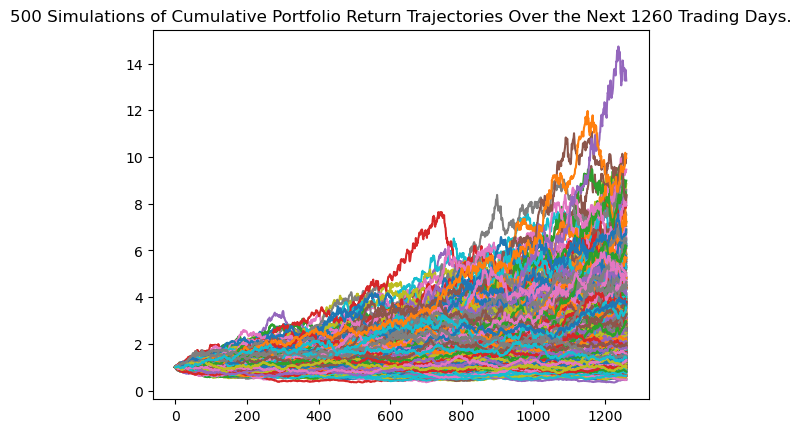

In [105]:
mc_test_paytech.plot_simulation()

In [106]:
mc_test_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

In [107]:
mc_test_banking.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.016550  0.999964  1.004979  0.995440  1.003861  1.007640  1.006466   
2     1.008185  1.023635  1.002947  0.991112  0.996439  1.007806  1.025845   
3     1.007115  0.997284  1.013696  0.987821  0.999259  1.025848  1.039780   
4     0.971880  1.007399  1.021430  1.002221  0.998987  1.021728  1.041434   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.302583  0.928559  1.891790  1.459102  1.172959  0.959172  2.352559   
1257  1.293320  0.940474  1.921251  1.456506  1.158116  0.977462  2.343404   
1258  1.314921  0.923256  1.921106  1.495630  1.169558  0.988972  2.347665   
1259  1.312754  0.923537  1.923018  1.496107  1.175770  1.000384  2.346848   
1260  1.312168  0.916391  1.946692  1.508421  1.195343  1.007169  2.374468   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000278  0.998128  1.001749  ...  1.009371  1.021757  1.003756   
2     0.997306  1.001648  1.025697  ...  1.021790  1.040389  0.998457   
3     0.986921  0.996316  1.014580  ...  1.022415  1.047301  1.001899   
4     0.985336  0.996862  1.004980  ...  1.011335  1.056087  1.005680   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.376814  1.875093  1.276775  ...  2.417800  0.990702  1.147685   
1257  1.379555  1.829395  1.274209  ...  2.422140  1.001595  1.150171   
1258  1.379343  1.818425  1.287813  ...  2.407101  0.981018  1.142205   
1259  1.355604  1.857524  1.305205  ...  2.397682  0.971702  1.146993   
1260  1.370051  1.828458  1.301933  ...  2.383888  0.979846  1.130219   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994419  1.001169  0.989749  0.981789  0.988381  1.003984  0.997730  
2     0.991350  1.005406  0.988038  0.977238  0.986410  1.002096  1.002999  
3     1.001456  0.996870  0.986280  0.988006  0.993876  0.997255  1.012154  
4     1.006492  0.984983  1.006300  1.008355  0.986105  1.000969  1.021882  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.626801  1.133616  0.848035  1.874176  1.334547  3.775126  1.432419  
1257  1.631242  1.159138  0.850431  1.880072  1.349513  3.737775  1.438298  
1258  1.623528  1.164100  0.858174  1.869986  1.352115  3.656597  1.452846  
1259  1.624051  1.160758  0.858171  1.890595  1.342239  3.636902  1.416789  
1260  1.631267  1.162654  0.867627  1.861398  1.345071  3.606711  1.453873  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

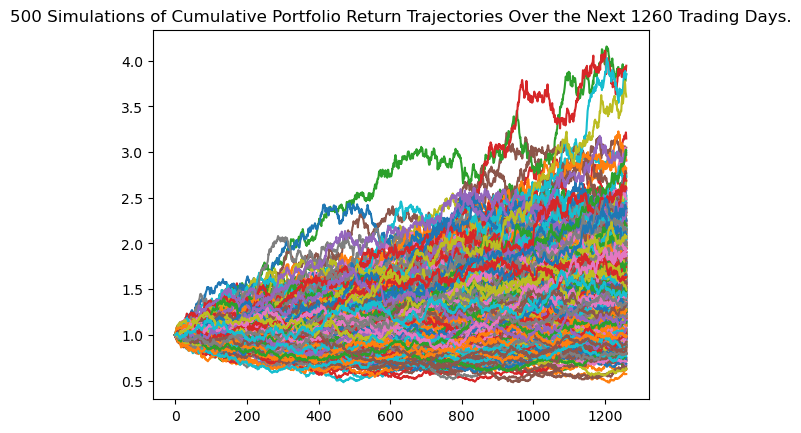

In [108]:
mc_test_banking.plot_simulation()

In [109]:
mc_test_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

In [110]:
mc_test_lending.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.012846  1.030736  0.976684  1.002791  0.979886  0.983841  0.963866   
2     1.007645  1.043011  0.939803  0.988721  0.958063  0.948630  0.945714   
3     1.022207  1.070446  0.929300  0.989486  0.955013  0.952125  0.954248   
4     1.028248  1.090571  0.934491  1.018324  0.943626  0.957642  0.943675   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.506849  0.971528  0.543715  1.335145  0.320856  1.357329  0.482576   
1257  0.500901  0.982339  0.539248  1.308641  0.322708  1.347905  0.487817   
1258  0.497917  1.022900  0.522979  1.284359  0.327018  1.392673  0.475874   
1259  0.490856  1.019000  0.501025  1.262189  0.325416  1.417774  0.471528   
1260  0.488004  1.040908  0.499784  1.264771  0.323006  1.437643  0.471877   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.990390  0.990527  0.959762  ...  1.048734  0.986328  1.002421   
2     0.974911  0.969928  0.951523  ...  1.047265  0.981574  1.009109   
3     0.952652  0.991450  0.982295  ...  1.016472  1.003387  1.008024   
4     0.966350  0.989019  0.983038  ...  1.022611  0.981493  1.035806   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.542209  1.278557  1.344892  ...  0.807228  0.375420  0.637533   
1257  0.537623  1.274141  1.338383  ...  0.825765  0.382015  0.626983   
1258  0.536554  1.239691  1.315357  ...  0.826167  0.377041  0.620773   
1259  0.546721  1.269473  1.305290  ...  0.841735  0.393526  0.596933   
1260  0.544584  1.264984  1.339575  ...  0.812464  0.397950  0.587521   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.988407  1.011277  0.999005  0.975035  0.976112  0.954039  0.998080  
2     0.995768  1.033906  1.004110  1.007547  0.989982  0.952836  1.017421  
3     1.009384  1.054270  1.009163  1.038696  0.973403  0.917793  0.991047  
4     1.041187  1.030429  1.025444  1.026366  0.975779  0.952425  0.974885  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.532201  0.438077  0.283162  0.302921  0.674694  0.176264  0.697710  
1257  0.506295  0.439245  0.282116  0.304542  0.671937  0.172120  0.690067  
1258  0.513804  0.426110  0.285601  0.303906  0.682342  0.167825  0.675339  
1259  0.509308  0.414817  0.288388  0.299993  0.687317  0.168744  0.684702  
1260  0.505447  0.427996  0.286541  0.294097  0.670055  0.166862  0.700390  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

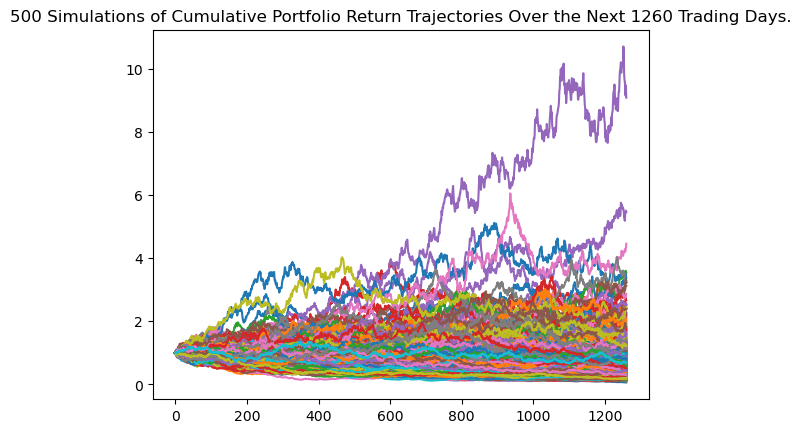

In [111]:
mc_test_lending.plot_simulation()

In [112]:
#

In [113]:
mc_test_paytech2 = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*5
)

In [114]:
mc_test_paytech2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.006200  1.018505  1.002835  0.999953  1.027747  0.973555  0.989450   
2     1.021019  0.993329  0.980593  1.034571  0.970045  0.968203  0.968252   
3     1.039820  1.004278  0.997527  1.034600  0.950352  0.961007  0.940581   
4     0.992173  1.026716  1.002443  1.037694  0.946722  0.961233  0.950301   
...        ...       ...       ...       ...       ...       ...       ...   
1256  5.746518  6.245726  2.214589  1.252174  0.525771  3.192715  1.301567   
1257  5.720537  6.343755  2.124193  1.236972  0.528781  3.158073  1.309620   
1258  5.660407  6.253545  2.145742  1.241408  0.535548  3.099862  1.290172   
1259  5.684289  6.381998  2.209814  1.268664  0.542133  3.105883  1.317443   
1260  5.688679  6.400793  2.168481  1.239085  0.546503  3.136295  1.297397   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.985243  0.984053  0.987957  ...  1.010511  0.998997  1.003742   
2     1.012088  0.989645  0.989166  ...  1.010320  1.007105  1.016908   
3     1.015863  0.942995  1.023794  ...  0.995052  0.989358  0.990746   
4     1.042385  0.943743  1.017183  ...  0.992044  0.973278  0.980966   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.291110  1.009754  1.485549  ...  1.099173  0.700435  1.696222   
1257  1.254548  0.999434  1.516573  ...  1.072151  0.682813  1.717927   
1258  1.231881  1.006923  1.548420  ...  1.108185  0.661583  1.713902   
1259  1.241903  1.009993  1.544069  ...  1.106626  0.687841  1.767564   
1260  1.237439  0.998319  1.543570  ...  1.122723  0.675516  1.811787   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995566  0.988952  1.016195  0.966423  0.995989  0.997472  0.994558  
2     0.961329  1.005146  0.995402  0.984388  0.966412  0.992459  0.977797  
3     0.963914  1.040497  0.986745  0.974973  0.963023  1.003622  0.976604  
4     0.952335  1.069221  0.976673  0.960381  0.955699  1.002990  1.011601  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.355479  1.213899  3.804443  2.986005  1.861574  3.890382  2.390305  
1257  1.388844  1.233396  3.781812  2.990569  1.895820  3.772192  2.358696  
1258  1.370564  1.239196  3.926567  3.027765  1.920485  3.703715  2.422032  
1259  1.364746  1.214515  3.858595  3.005137  1.904751  3.638494  2.321976  
1260  1.341545  1.222946  3.969156  3.011051  1.947012  3.636806  2.309463  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

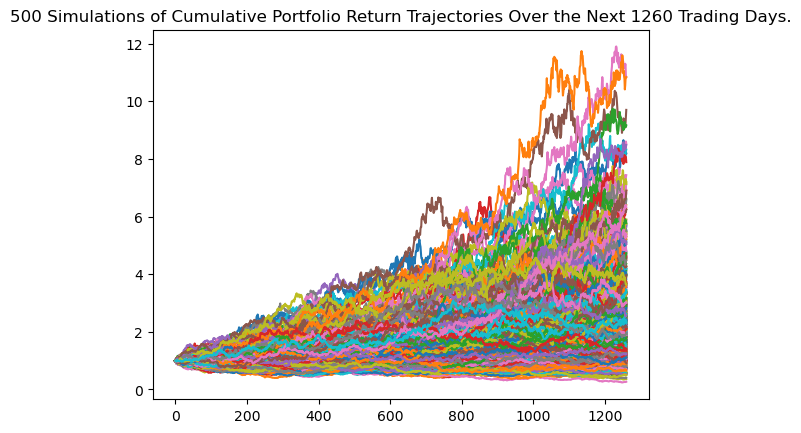

In [115]:
mc_test_paytech2.plot_simulation()

In [116]:
mc_test_banking2 = MCSimulation(
    portfolio_data=banking_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*5
)

In [117]:
mc_test_banking2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996843  1.007668  1.000275  1.004389  1.007006  1.013406  1.008589   
2     1.001537  1.022095  0.984103  1.001443  1.044196  1.020449  1.005254   
3     1.004967  1.024393  0.967795  1.001019  1.049458  1.026130  0.989256   
4     1.004635  1.024763  0.968023  1.011561  1.034157  1.031191  0.984951   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.229900  2.573034  1.726567  2.453608  1.099038  1.456430  2.286023   
1257  1.234475  2.594029  1.718860  2.441864  1.071593  1.447927  2.231318   
1258  1.261129  2.591229  1.702680  2.402512  1.093511  1.473647  2.230349   
1259  1.261485  2.616577  1.685827  2.398034  1.110372  1.468116  2.242942   
1260  1.273070  2.620876  1.672303  2.410935  1.109336  1.456101  2.219666   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.014119  0.994246  0.992791  ...  0.991054  1.013199  1.013593   
2     1.017092  1.010676  1.003071  ...  0.986394  1.003201  1.014733   
3     1.013003  0.998586  1.022304  ...  0.967122  0.987846  1.005205   
4     1.036188  0.977400  1.023921  ...  0.961284  0.994771  1.004996   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.703561  1.582461  1.007635  ...  2.636749  0.945855  1.364986   
1257  1.693807  1.565579  1.008146  ...  2.615148  0.925376  1.384120   
1258  1.684506  1.568215  0.982169  ...  2.639392  0.926022  1.387028   
1259  1.662347  1.598367  0.983528  ...  2.607994  0.922173  1.394883   
1260  1.657567  1.636243  0.979315  ...  2.650234  0.916617  1.389386   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.993241  0.962343  1.009194  0.981976  0.998147  1.002476  0.991559  
2     0.970651  0.952596  0.988304  0.982892  0.979266  1.004598  1.008811  
3     0.978226  0.951131  1.013237  0.982329  0.980827  0.990532  1.006430  
4     0.985858  0.945517  1.000533  0.966895  0.990450  0.979881  0.995305  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.511917  0.910536  1.121752  0.764483  0.875716  1.182331  1.880924  
1257  1.527940  0.905108  1.105018  0.768070  0.861164  1.179616  1.905899  
1258  1.551811  0.908279  1.091869  0.773166  0.874928  1.184237  1.884341  
1259  1.564099  0.913598  1.087220  0.767112  0.871737  1.202870  1.875430  
1260  1.543177  0.895446  1.103034  0.772435  0.857511  1.198943  1.886760  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

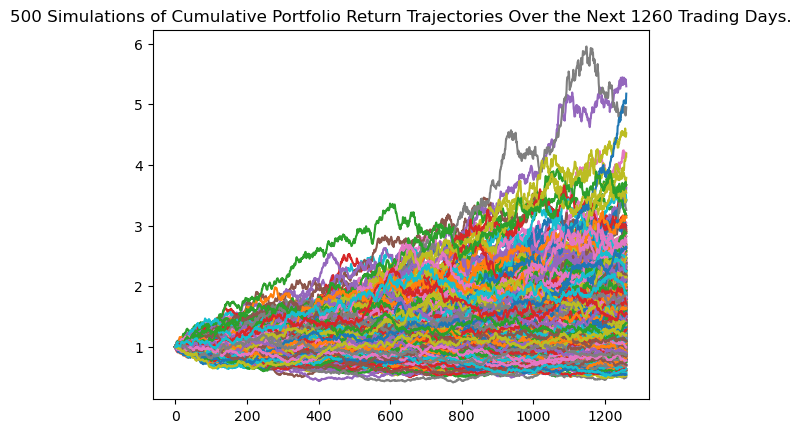

In [118]:
mc_test_banking2.plot_simulation()

In [119]:
mc_test_lending2 = MCSimulation(
    portfolio_data=lending_df,
    weights=[.50,.20, .30],
    num_simulation=500,
    num_trading_days=252*5
)

In [120]:
mc_test_lending2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.944909  1.000982  1.010224  1.016933  0.996940  1.002202  1.008180   
2     0.924131  1.040229  1.022469  1.024524  0.991704  1.021617  1.015749   
3     0.899874  1.062950  1.014531  1.017067  0.986066  1.055279  1.035895   
4     0.887001  1.044277  1.028816  1.010873  1.010531  1.082194  1.025571   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.182207  0.454985  0.624325  1.884935  0.180586  0.110240  0.402226   
1257  0.183267  0.442366  0.635019  1.915933  0.185455  0.105657  0.406027   
1258  0.188129  0.439677  0.653268  1.875184  0.186954  0.108225  0.400802   
1259  0.190841  0.425878  0.655019  1.855436  0.187059  0.110213  0.389674   
1260  0.187627  0.436773  0.646259  1.871616  0.185331  0.107073  0.379235   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.007379  0.990599  1.014012  ...  1.014838  0.970606  0.987748   
2     1.013090  0.980337  1.020929  ...  1.021995  0.972899  0.972253   
3     1.003250  0.978913  1.036455  ...  1.025298  0.993356  0.977081   
4     1.036128  0.986749  1.068974  ...  1.037622  1.002412  0.978762   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.465919  0.384413  0.093201  ...  0.556284  0.185099  0.518424   
1257  0.466754  0.391104  0.097348  ...  0.556191  0.186451  0.521826   
1258  0.449247  0.389117  0.096010  ...  0.543720  0.189541  0.509574   
1259  0.463046  0.383095  0.092933  ...  0.526776  0.193294  0.522155   
1260  0.479184  0.377699  0.089771  ...  0.519289  0.186778  0.507644   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.015699  1.022157  0.992838  1.029736  0.994694  0.979279  1.006948  
2     0.979942  1.025609  1.011224  1.022880  0.994190  0.943396  1.014799  
3     0.997967  1.050449  1.011447  1.048559  0.953789  0.973864  1.044828  
4     1.027102  1.053836  1.030701  1.050262  0.938620  0.923323  1.042295  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.268059  0.325886  0.224750  0.406273  0.402084  1.367295  0.450668  
1257  0.256544  0.321278  0.226380  0.405606  0.402647  1.440527  0.454201  
1258  0.256666  0.316574  0.217537  0.411817  0.399922  1.460044  0.459239  
1259  0.256057  0.310858  0.222233  0.403188  0.392657  1.391551  0.470365  
1260  0.261723  0.307469  0.223716  0.398443  0.388560  1.372045  0.460076  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

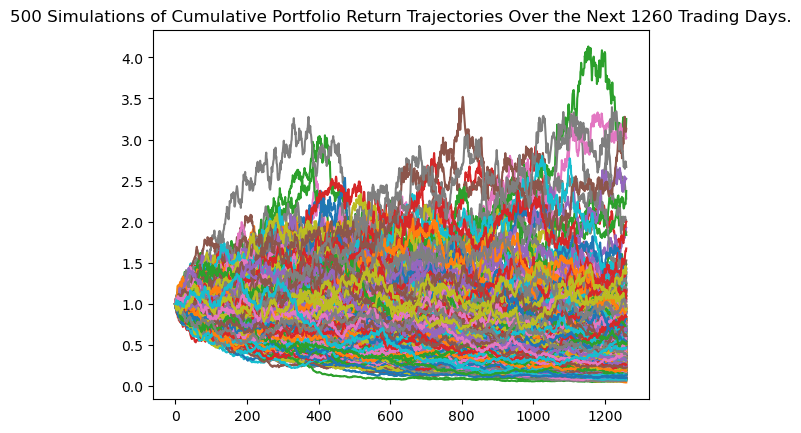

In [121]:
mc_test_lending2.plot_simulation()

In [122]:
mc_1y_test_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

In [123]:
mc_1y_test_paytech.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.024766  0.978010  1.012248  0.980067  1.042995  0.981972  0.994507   
2    1.004689  1.010803  1.001756  0.935786  1.060082  0.961416  1.017282   
3    1.018075  0.977671  0.991088  0.945041  1.066757  0.991869  1.033535   
4    1.034096  0.964032  0.947313  0.939089  1.019998  1.033942  1.023566   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.399514  0.747198  0.985818  1.021573  1.039395  1.502443  0.977529   
249  1.397492  0.724511  0.979333  1.003374  1.056286  1.523890  0.982459   
250  1.395389  0.727957  0.978837  0.976506  1.056299  1.515204  1.008237   
251  1.414122  0.722900  0.990822  0.957310  1.078223  1.514263  1.015829   
252  1.392810  0.730877  1.013164  0.979944  1.043680  1.491743  1.010081   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.959413  0.993394  1.002048  ...  0.981925  0.994778  1.019042   
2    0.946500  0.998967  0.980917  ...  0.993038  0.972825  1.020723   
3    0.947226  1.006914  0.935893  ...  0.984928  0.945939  1.027215   
4    0.943045  1.008826  0.936366  ...  0.999089  0.963211  1.032195   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.087702  1.012825  0.664269  ...  0.688382  0.922904  1.477904   
249  1.064222  1.010571  0.669395  ...  0.697099  0.932564  1.484808   
250  1.041496  1.011443  0.657137  ...  0.718139  0.930487  1.433188   
251  1.040741  1.020501  0.646793  ...  0.711577  0.927687  1.403146   
252  1.040288  0.984731  0.650654  ...  0.711500  0.916811  1.415857   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.004774  1.006613  1.008111  0.999988  0.989726  1.001263  0.946535  
2    0.967220  1.018596  1.007874  1.012673  0.993541  1.002873  0.953681  
3    0.976251  0.999631  1.013297  1.010490  0.986113  0.984031  0.945620  
4    0.953220  0.985369  1.023131  0.998266  0.977038  0.965060  0.954584  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.751176  0.724439  0.865763  0.636894  1.153983  1.044060  1.082676  
249  0.758894  0.693085  0.851125  0.644446  1.152274  1.068220  1.108434  
250  0.765413  0.701228  0.852053  0.651058  1.161624  1.072021  1.100668  
251  0.762095  0.694868  0.840675  0.642163  1.152249  1.063909  1.101947  
252  0.756723  0.688818  0.834484  0.659623  1.193517  1.037636  1.061059  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

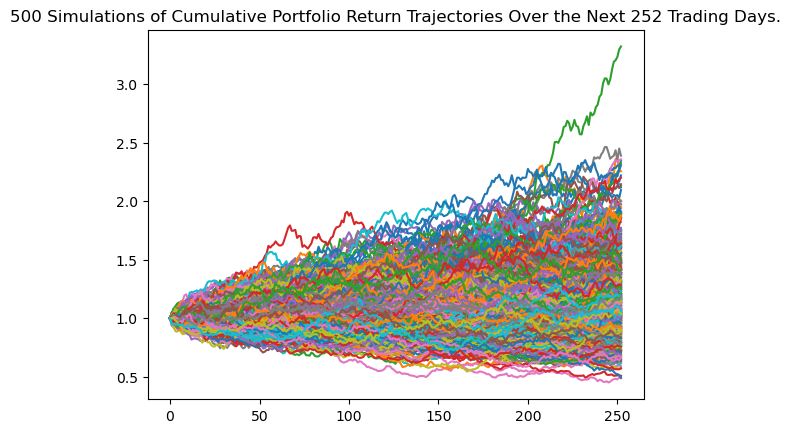

In [124]:
mc_1y_test_paytech.plot_simulation()

In [125]:
mc_1y_test_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

In [126]:
mc_1y_test_banking.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.000885  1.000302  1.012506  1.005449  0.997655  0.982745  0.986957   
2    0.991590  0.996169  1.001159  1.010969  0.992800  0.987789  0.982828   
3    0.991679  0.995349  0.988554  1.004507  0.979147  0.990326  0.998759   
4    0.971854  1.010746  0.995595  0.999954  0.981263  1.003796  0.982840   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.202627  1.092746  0.909444  1.031522  0.891423  1.062049  1.038773   
249  1.201130  1.099274  0.925470  1.029004  0.886570  1.059858  1.038295   
250  1.191568  1.088868  0.936429  1.008230  0.898651  1.075001  1.036243   
251  1.199171  1.082215  0.940146  1.010620  0.897514  1.084325  1.038084   
252  1.198277  1.075186  0.922462  0.994529  0.896756  1.088755  1.022338   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.015489  1.014902  1.004706  ...  0.996919  0.992931  0.988338   
2    1.007657  1.035029  1.004166  ...  0.995194  0.987404  1.004801   
3    1.004236  1.017935  0.991734  ...  1.011979  0.965357  1.008288   
4    0.997020  1.041553  1.003142  ...  1.036240  0.968297  1.008285   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.790621  1.233246  0.913561  ...  1.009517  1.234811  1.298292   
249  0.805086  1.239621  0.899611  ...  1.009805  1.227140  1.297514   
250  0.793399  1.254233  0.898229  ...  1.016739  1.217444  1.307746   
251  0.791827  1.253527  0.888528  ...  1.011117  1.223519  1.302765   
252  0.789579  1.227503  0.871961  ...  1.000260  1.224635  1.313423   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.985867  0.983696  1.008335  0.998223  0.985795  1.010472  1.011947  
2    0.985333  0.975148  1.001137  0.999657  0.995308  1.011182  1.004376  
3    0.977612  0.982084  0.995193  1.008224  0.992353  1.029197  0.996842  
4    0.969335  0.968055  1.004802  0.992844  1.010664  1.012755  0.997818  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.793221  0.857638  1.153278  0.996887  0.923255  1.325977  1.122408  
249  0.790084  0.863000  1.162119  0.998816  0.929419  1.309854  1.107933  
250  0.793254  0.868793  1.182836  0.985550  0.935893  1.298778  1.130821  
251  0.797676  0.866615  1.199983  0.981822  0.930846  1.305579  1.112824  
252  0.799647  0.859086  1.200756  0.992669  0.930091  1.337997  1.102292  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

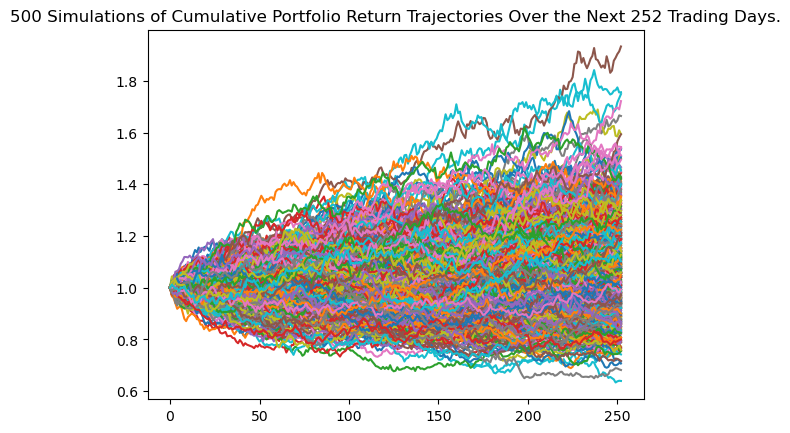

In [127]:
mc_1y_test_banking.plot_simulation()

In [128]:
mc_1y_test_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

In [129]:
mc_1y_test_lending.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.028761  0.976661  0.999580  0.992606  0.995379  0.991137  0.996006   
2    1.030559  0.973401  1.012505  1.003750  1.005967  1.001106  1.014860   
3    0.996352  0.986311  1.007085  1.006285  0.995951  1.016716  1.019414   
4    0.986146  0.999833  1.012811  1.017671  1.005706  1.012734  1.022030   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.156632  0.877011  1.011573  1.172851  0.882241  0.917718  1.093705   
249  1.209193  0.845702  0.999046  1.177646  0.887592  0.930405  1.103309   
250  1.203182  0.871425  0.971569  1.222113  0.909556  0.944701  1.147026   
251  1.148603  0.877782  0.963435  1.203573  0.883631  0.938451  1.130615   
252  1.150293  0.881066  0.959013  1.173336  0.864577  0.943011  1.117591   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.960709  1.006971  0.991457  ...  1.027079  1.019951  1.004500   
2    0.932490  1.024364  0.970671  ...  1.025461  1.040142  0.992239   
3    0.909480  1.007598  0.986370  ...  0.997872  1.031263  1.005239   
4    0.958403  1.045184  0.966337  ...  0.989571  1.071453  0.998284   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.578065  0.797502  1.004268  ...  1.443383  0.814590  1.029223   
249  0.580049  0.813601  0.983639  ...  1.457857  0.814137  1.017091   
250  0.588049  0.817234  0.980803  ...  1.462944  0.833125  1.004021   
251  0.598997  0.834301  1.004503  ...  1.460715  0.835607  0.976256   
252  0.570746  0.838985  1.005488  ...  1.391682  0.829978  0.997986   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.985493  0.994180  1.019898  0.982980  1.018032  0.991337  0.992715  
2    0.969405  1.004939  0.984803  0.985974  1.010471  0.951566  0.999624  
3    0.930912  1.049034  0.989095  0.977800  1.066824  0.925262  0.969543  
4    0.935378  1.059054  1.004082  0.984634  1.103048  0.905683  0.939269  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.773263  1.028613  1.203943  1.402974  0.964243  1.047754  0.875655  
249  0.769678  1.045146  1.208372  1.427156  0.955518  1.029416  0.875152  
250  0.758416  1.045893  1.207046  1.409622  0.968682  1.036659  0.861994  
251  0.765950  1.055999  1.220180  1.370143  0.978602  1.004693  0.834518  
252  0.791463  1.046141  1.258436  1.392876  0.941783  1.027449  0.834391  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

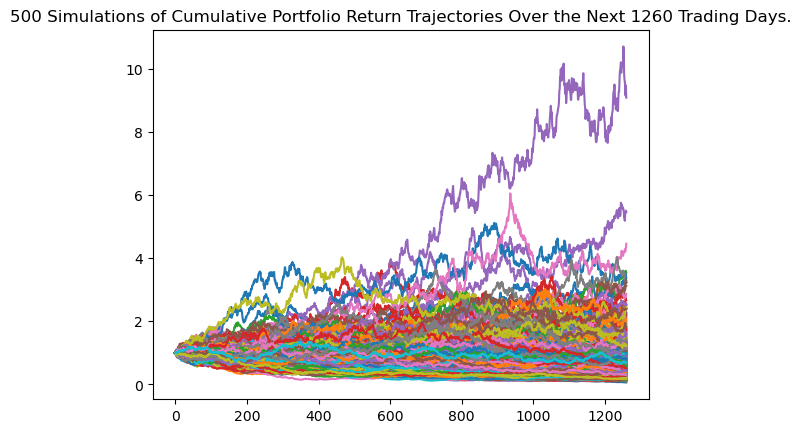

In [130]:
mc_test_lending.plot_simulation()

In [131]:
mc_1y_test_paytech2 = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*1
)

In [132]:
mc_1y_test_paytech2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.020421  1.004711  1.019113  0.999659  0.998537  0.992216  1.043096   
2    1.038405  0.995703  1.011678  0.986609  1.006708  0.995538  1.039820   
3    1.025285  0.969783  1.038352  1.004076  1.016916  0.996226  1.077237   
4    1.019897  0.958583  1.049090  1.015253  0.990840  1.017281  1.076332   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.044655  1.194240  1.348366  1.605623  0.987684  1.007850  1.304876   
249  1.055191  1.193569  1.323488  1.649718  0.984719  0.995595  1.276930   
250  1.041984  1.184910  1.364764  1.634448  0.991340  1.007549  1.300883   
251  1.045710  1.167219  1.377756  1.609282  0.981478  1.045801  1.302975   
252  1.023444  1.159522  1.373479  1.611204  0.991812  1.026335  1.286958   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.013989  1.030251  0.994931  ...  1.016853  0.985991  0.995962   
2    1.030976  1.024733  0.977608  ...  1.008341  0.968612  1.003985   
3    1.017175  1.026278  0.957693  ...  1.004065  0.953601  1.004546   
4    1.040316  1.047006  0.960035  ...  1.020224  0.920351  1.009727   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.626788  2.295429  0.995012  ...  1.275908  1.589696  1.112525   
249  0.629483  2.315211  0.981098  ...  1.275900  1.590573  1.090209   
250  0.654537  2.275334  0.972818  ...  1.256139  1.579826  1.071010   
251  0.656051  2.264624  0.949082  ...  1.233069  1.596302  1.050433   
252  0.650648  2.196552  0.946006  ...  1.226722  1.564787  1.061538   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.003641  0.992044  0.994238  0.989239  1.035284  1.007455  0.981641  
2    1.004211  1.017504  1.014145  0.951084  1.032774  1.019424  0.991338  
3    1.000925  1.007650  1.013815  0.942557  1.041253  1.020436  0.964705  
4    0.989365  1.017689  1.018619  0.931491  1.015348  1.020051  0.956660  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.978714  1.270703  2.058848  1.038163  0.834102  1.384739  1.031965  
249  0.955930  1.311300  2.073572  1.023829  0.840680  1.386610  1.014228  
250  0.948668  1.350772  2.097003  1.027611  0.826856  1.406298  1.009425  
251  0.928404  1.381483  2.137543  1.033631  0.807889  1.383381  1.010852  
252  0.937446  1.368049  2.150376  1.029674  0.799176  1.388394  0.972593  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

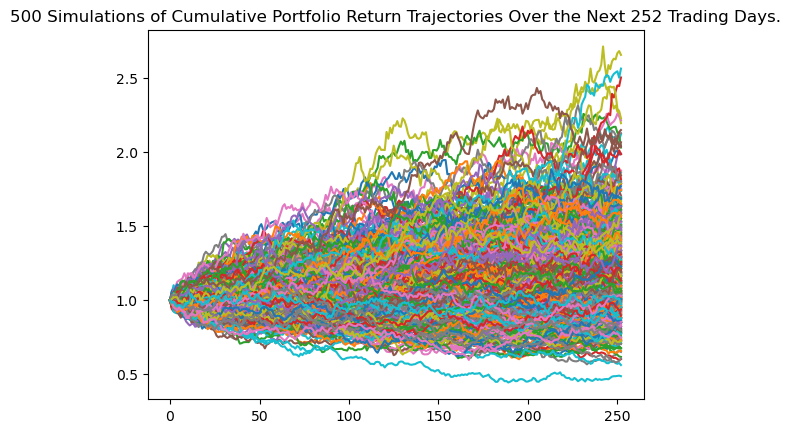

In [133]:
mc_1y_test_paytech2.plot_simulation()

In [134]:
mc_1y_test_banking2 = MCSimulation(
    portfolio_data=banking_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*1
)

In [135]:
mc_1y_test_banking2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.010647  1.009819  1.005108  1.005118  0.981846  0.995992  1.000326   
2    1.025528  1.003307  1.015094  1.004248  0.973093  1.016414  0.981136   
3    1.025351  0.997349  1.025405  1.022830  0.977143  1.029162  0.977553   
4    1.019409  0.997713  1.034046  1.028090  0.978748  1.047693  0.969985   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.219718  1.156704  1.104574  0.814926  0.949200  1.550648  1.300078   
249  1.223161  1.151274  1.105664  0.812477  0.961548  1.521653  1.290138   
250  1.220337  1.147390  1.111988  0.833649  0.968156  1.526612  1.276956   
251  1.229908  1.131581  1.114390  0.824514  0.973428  1.541080  1.276027   
252  1.217416  1.126280  1.114131  0.847511  0.976438  1.535405  1.261258   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.008276  1.001155  1.001759  ...  0.995441  1.002999  0.995087   
2    0.995647  0.990849  1.007601  ...  0.984704  1.000875  1.007664   
3    0.989635  1.000895  0.995929  ...  0.980168  0.997178  0.997115   
4    1.009015  1.008312  1.014333  ...  0.977077  0.995940  1.002799   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.302593  1.281573  1.046064  ...  0.943886  1.322477  1.216753   
249  1.303378  1.290641  1.039957  ...  0.947015  1.327461  1.201632   
250  1.291072  1.286519  1.042723  ...  0.942119  1.336643  1.211460   
251  1.310651  1.290580  1.048022  ...  0.941988  1.342940  1.189162   
252  1.307984  1.253914  1.056933  ...  0.937449  1.363869  1.211045   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.021189  1.002617  1.006947  1.002382  0.972990  1.002550  1.013092  
2    1.014322  1.021515  1.018819  0.994228  0.982473  1.019716  1.007587  
3    0.997641  1.014030  1.007491  1.001161  0.983961  0.998698  1.025988  
4    0.991825  1.009214  1.005612  1.020393  0.976946  1.008766  1.015994  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.161484  1.499301  1.318440  0.990982  0.886137  1.095742  0.832426  
249  1.174938  1.512609  1.278370  1.012068  0.891830  1.117729  0.851653  
250  1.188935  1.527169  1.288198  1.000133  0.889057  1.108047  0.847282  
251  1.180061  1.541714  1.304659  0.996984  0.878886  1.098173  0.841233  
252  1.188013  1.530519  1.319687  0.996593  0.872621  1.106270  0.853618  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

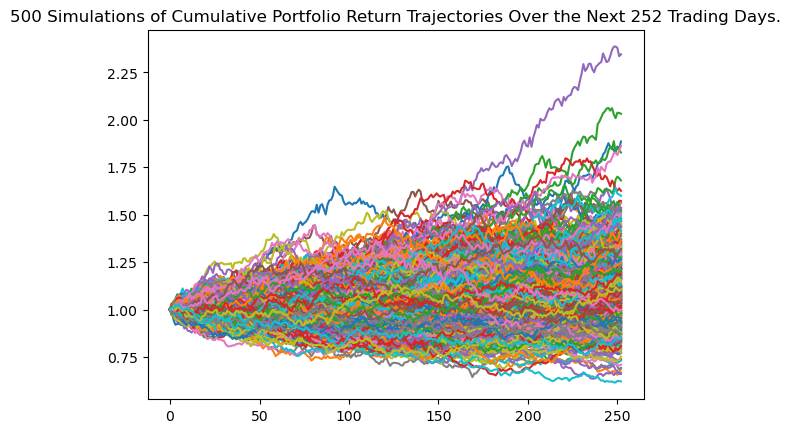

In [136]:
mc_1y_test_banking2.plot_simulation()

In [137]:
mc_1y_test_lending2 = MCSimulation(
    portfolio_data=lending_df,
    weights=[.50, .20, .30],
    num_simulation=500,
    num_trading_days=252*1
)

In [138]:
mc_1y_test_lending2.calc_cumulative_return()

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.994460  0.993462  1.018779  1.005190  0.973507  0.998580  0.951775   
2    1.014365  0.972009  1.003126  0.997281  0.962555  1.010898  0.910176   
3    1.008623  0.980903  1.017144  0.999745  0.970396  1.006551  0.956251   
4    0.995835  1.004734  1.040574  0.976336  0.961762  0.964725  0.961996   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.587646  0.518587  1.205392  0.759519  1.060031  1.379456  0.522790   
249  0.611774  0.526055  1.240881  0.728174  1.100842  1.404487  0.537266   
250  0.624102  0.518600  1.247331  0.723328  1.129594  1.397948  0.527217   
251  0.618353  0.519337  1.255147  0.719645  1.152057  1.424508  0.511899   
252  0.626766  0.510782  1.283086  0.729287  1.162944  1.428209  0.518729   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.024496  1.043452  0.990978  ...  1.002702  1.017930  0.990139   
2    1.009097  1.049810  0.996159  ...  0.949325  1.003898  0.963366   
3    0.980806  1.023003  0.990504  ...  0.964653  0.989413  0.952498   
4    0.972637  1.021100  0.988505  ...  0.954643  0.953232  0.958261   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.880414  0.618071  1.306375  ...  0.869598  0.556788  0.837622   
249  0.849709  0.626199  1.314114  ...  0.883457  0.561467  0.848330   
250  0.861520  0.644378  1.311546  ...  0.889826  0.568362  0.876639   
251  0.859923  0.646427  1.326067  ...  0.881936  0.591900  0.860794   
252  0.837445  0.657250  1.334858  ...  0.915163  0.565301  0.842651   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.988175  1.005860  0.977023  1.020121  1.011950  0.982134  1.006650  
2    0.991747  1.012663  0.992853  1.030023  1.013848  0.984938  1.005437  
3    0.974002  1.024644  1.003820  1.000256  1.022781  0.958994  1.046200  
4    0.969371  1.030902  1.003531  1.022960  1.025377  0.968947  1.063741  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.066333  0.658953  0.828646  0.960168  1.582451  0.664014  0.740486  
249  1.101030  0.652639  0.846122  1.037587  1.580250  0.678644  0.738647  
250  1.110252  0.659537  0.861898  1.042449  1.593728  0.660310  0.746767  
251  1.085347  0.646669  0.835386  1.023157  1.675913  0.664270  0.749641  
252  1.092938  0.657603  0.814917  1.008467  1.706094  0.679361  0.764703  

[253 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

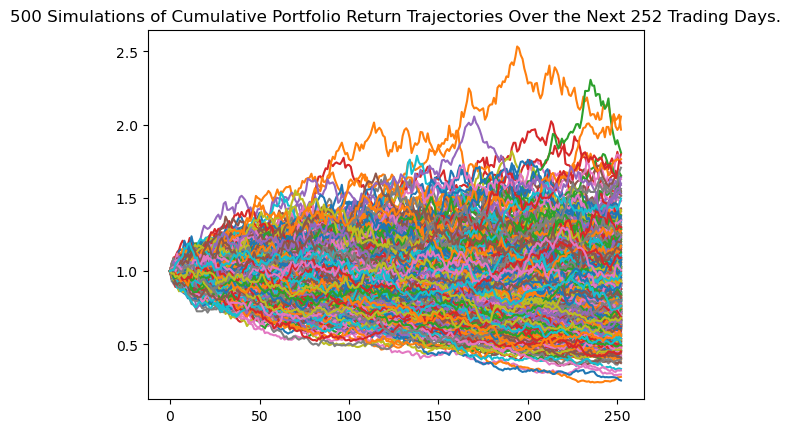

In [139]:
mc_1y_test_lending2.plot_simulation()